In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('world-happiness-report-2021.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [3]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [5]:
features = ['Logged GDP per capita', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']
X = data[features]
y = data['Ladder score in Dystopia']

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.9721522630525295e-31
R-squared: 0.75


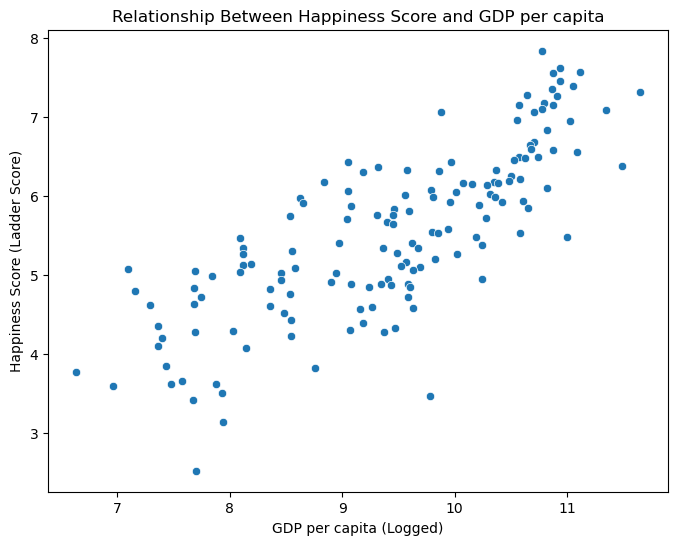

In [8]:
# Create a scatter plot to visualize the relationship between Happiness Score and GDP per capita
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', data=data)
plt.xlabel('GDP per capita (Logged)')
plt.ylabel('Happiness Score (Ladder Score)')
plt.title('Relationship Between Happiness Score and GDP per capita')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7312\713954469.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


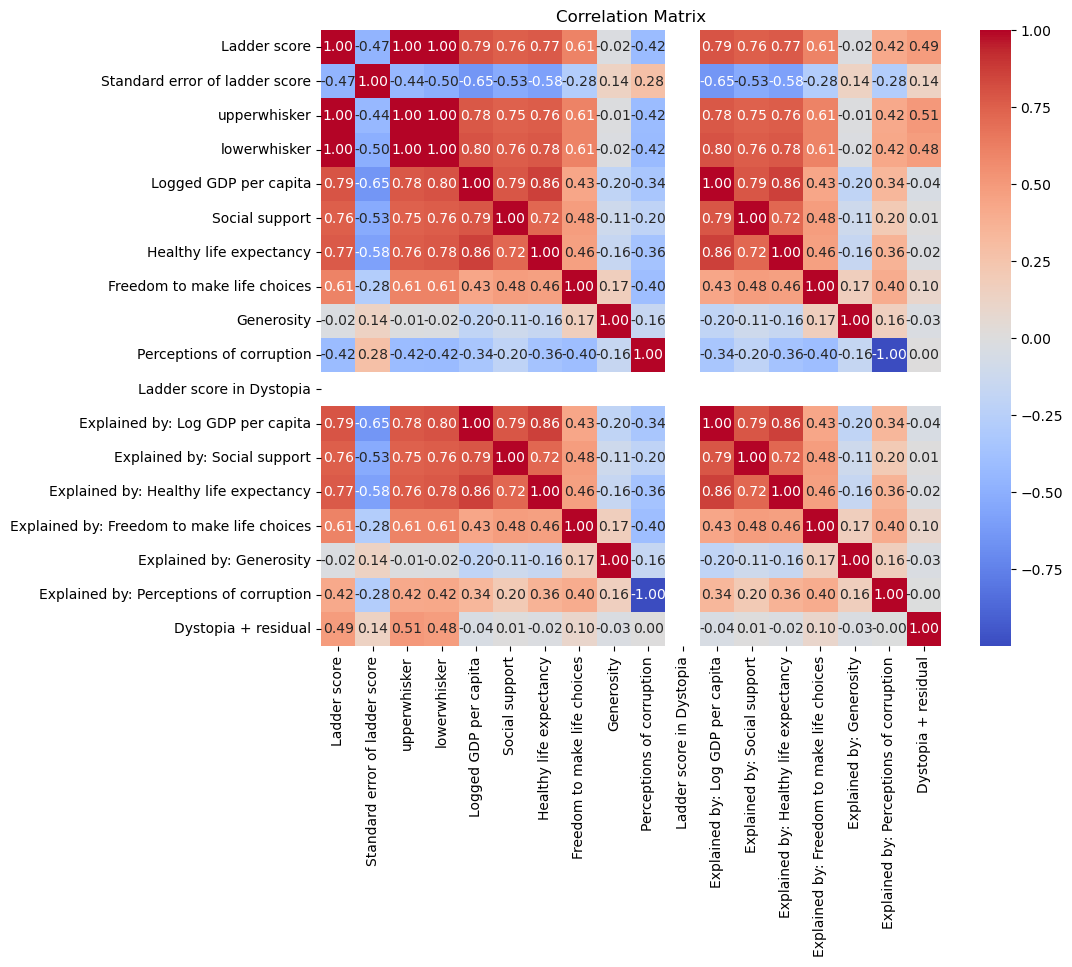

In [9]:
# Create a correlation matrix to see the correlation between all factors and Happiness Score
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


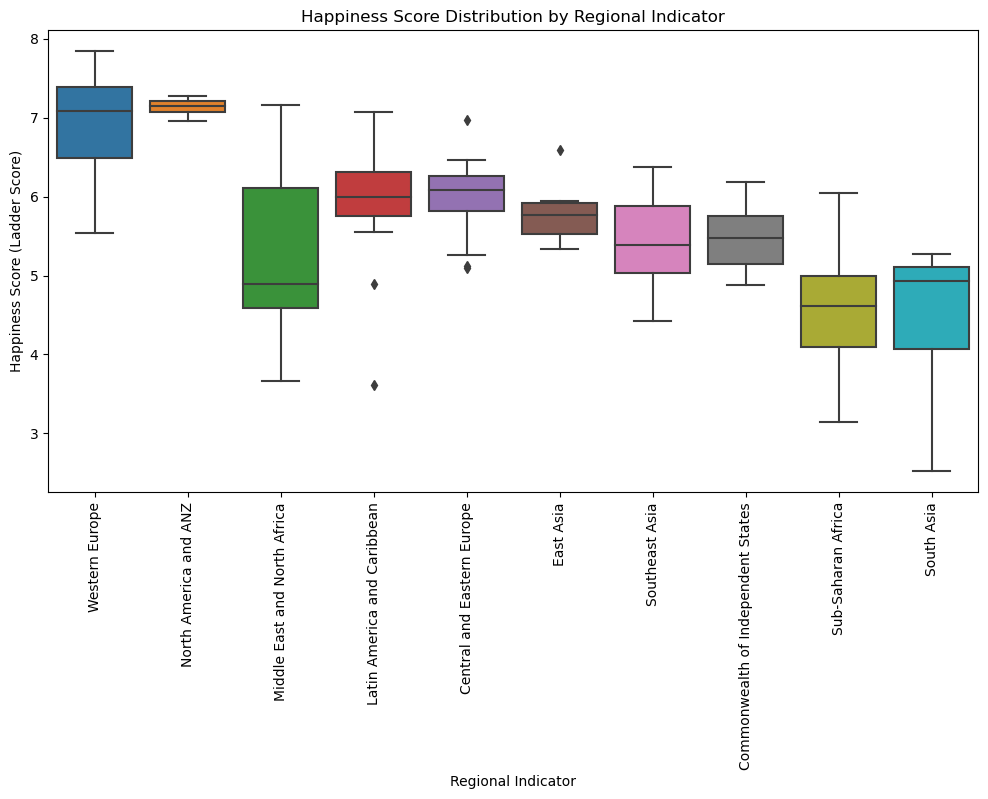

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='Ladder score', data=data)
plt.xticks(rotation=90)
plt.xlabel('Regional Indicator')
plt.ylabel('Happiness Score (Ladder Score)')
plt.title('Happiness Score Distribution by Regional Indicator')
plt.show()


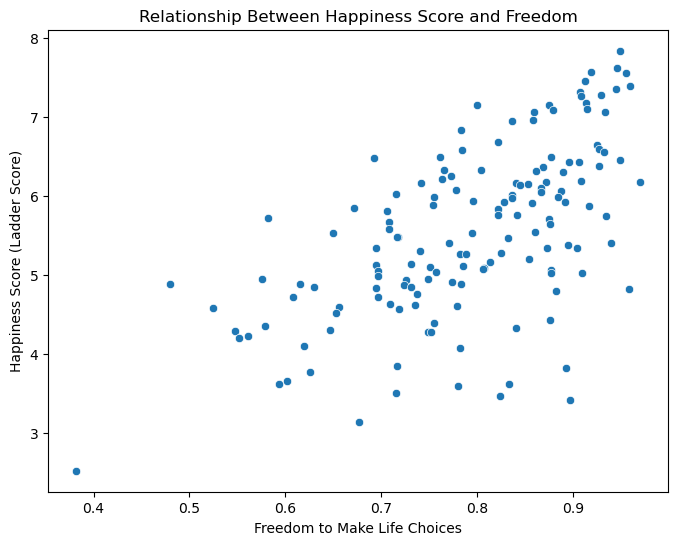

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Freedom to make life choices', y='Ladder score', data=data)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score (Ladder Score)')
plt.title('Relationship Between Happiness Score and Freedom')
plt.show()


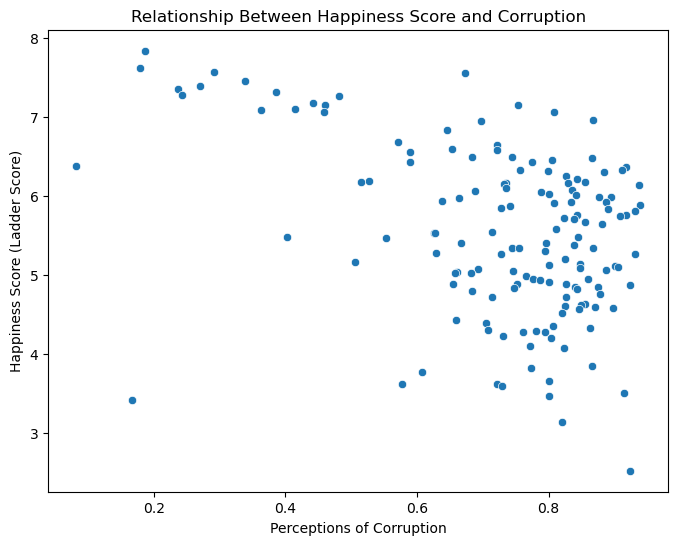

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Perceptions of corruption', y='Ladder score', data=data)
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Happiness Score (Ladder Score)')
plt.title('Relationship Between Happiness Score and Corruption')
plt.show()


In [13]:
# Sorting the dataset by happiness score in descending order for the top ten
top_10_happiest = data.sort_values(by='Ladder score', ascending=False).head(10)

# Sorting the dataset by happiness score in ascending order for the bottom ten
bottom_10_least_happy = data.sort_values(by='Ladder score', ascending=True).head(10)


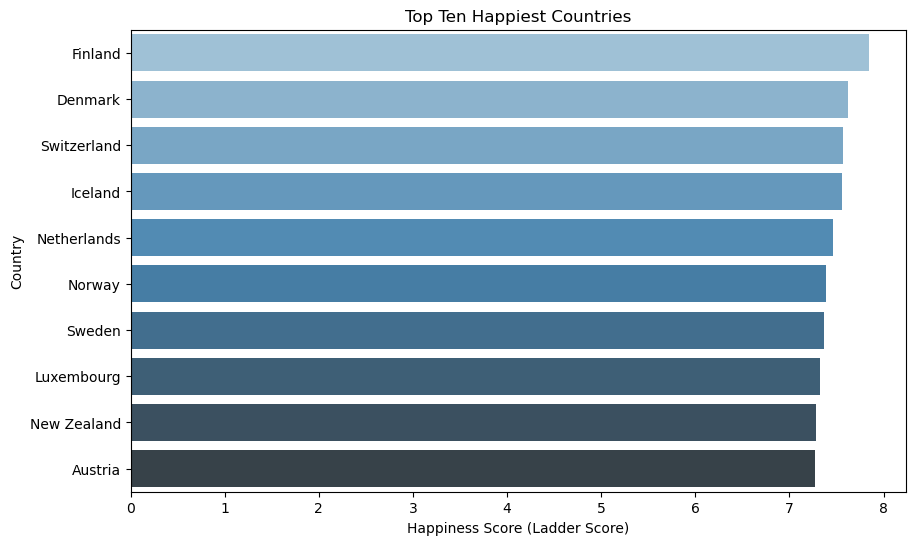

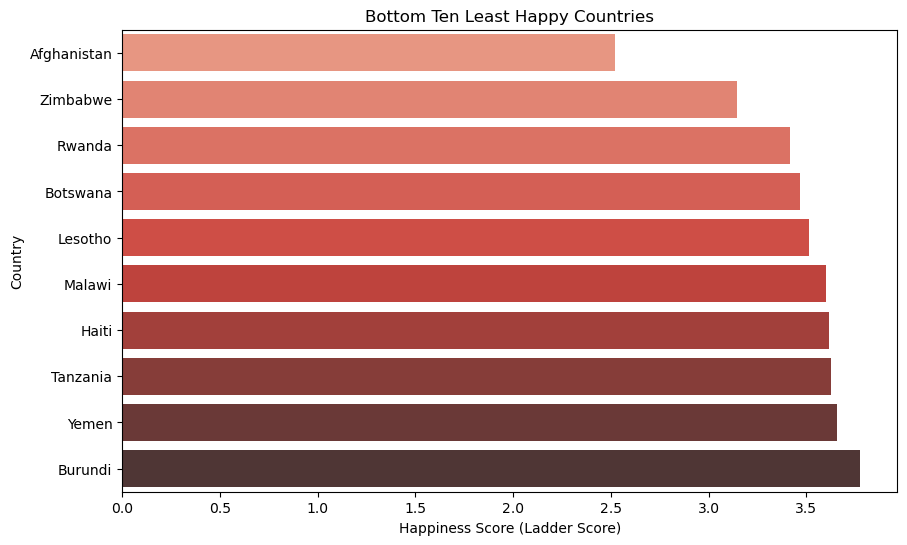

In [14]:
# Plotting the top ten happiest countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Ladder score', y='Country name', data=top_10_happiest, palette='Blues_d')
plt.xlabel('Happiness Score (Ladder Score)')
plt.ylabel('Country')
plt.title('Top Ten Happiest Countries')
plt.show()

# Plotting the bottom ten least happy countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Ladder score', y='Country name', data=bottom_10_least_happy, palette='Reds_d')
plt.xlabel('Happiness Score (Ladder Score)')
plt.ylabel('Country')
plt.title('Bottom Ten Least Happy Countries')
plt.show()


In [15]:
# Filter data for a specific year (e.g., 2021)
year_2021 = data[data['Country name'] == 2021]
year_2022 = data[data['Country name'] == 2022]
year_2023 = data[data['Country name'] == 2023]

# Sort data by Ladder score in descending order to get the happiest countries
happiest_2021 = year_2021.sort_values(by='Ladder score', ascending=False)
happiest_2022 = year_2022.sort_values(by='Ladder score', ascending=False)
happiest_2023 = year_2023.sort_values(by='Ladder score', ascending=False)

# To get the unhappiest countries, simply change 'ascending=True'
unhappiest_2021 = year_2021.sort_values(by='Ladder score', ascending=True)
unhappiest_2022 = year_2022.sort_values(by='Ladder score', ascending=True)
unhappiest_2023 = year_2023.sort_values(by='Ladder score', ascending=True)

# Display the happiest and unhappiest countries for each specific year
print(f'Happiest Countries in 2021:')
print(happiest_2021[['Country name', 'Ladder score']].head(10))
print(f'Unhappiest Countries in 2021:')
print(unhappiest_2021[['Country name', 'Ladder score']].head(10))

print(f'Happiest Countries in 2022:')
print(happiest_2022[['Country name', 'Ladder score']].head(10))
print(f'Unhappiest Countries in 2022:')
print(unhappiest_2022[['Country name', 'Ladder score']].head(10))

print(f'Happiest Countries in 2023:')
print(happiest_2023[['Country name', 'Ladder score']].head(10))
print(f'Unhappiest Countries in 2023:')
print(unhappiest_2023[['Country name', 'Ladder score']].head(10))


Happiest Countries in 2021:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Unhappiest Countries in 2021:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Happiest Countries in 2022:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Unhappiest Countries in 2022:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Happiest Countries in 2023:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Unhappiest Countries in 2023:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []


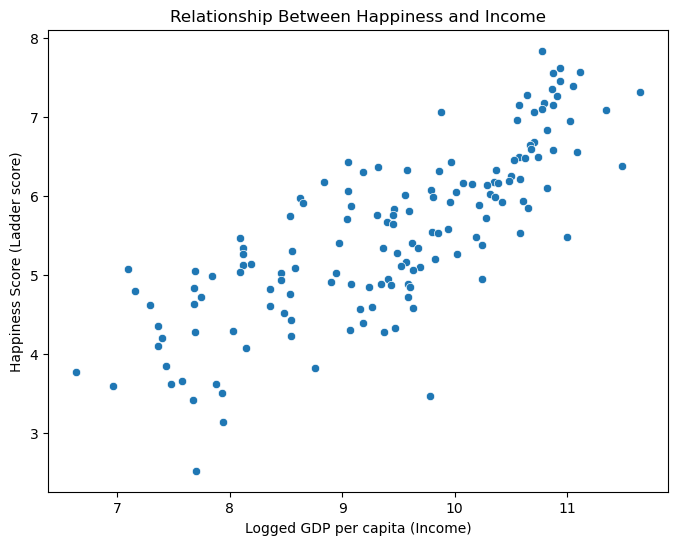

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', data=data)
plt.xlabel('Logged GDP per capita (Income)')
plt.ylabel('Happiness Score (Ladder score)')
plt.title('Relationship Between Happiness and Income')
plt.show()


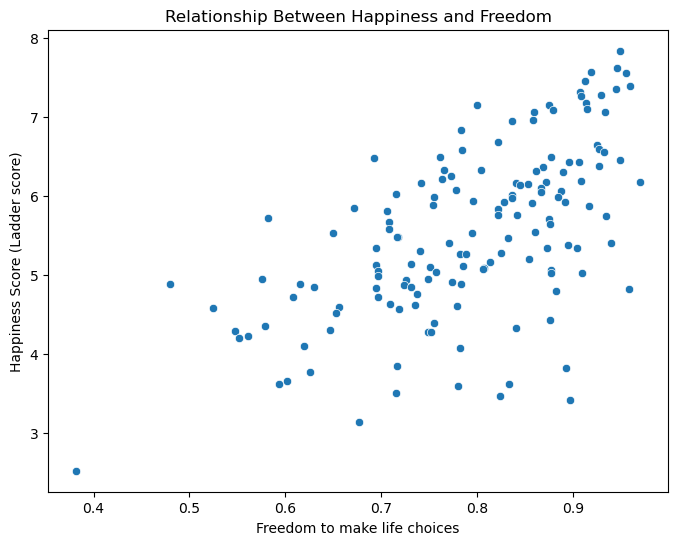

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Freedom to make life choices', y='Ladder score', data=data)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score (Ladder score)')
plt.title('Relationship Between Happiness and Freedom')
plt.show()


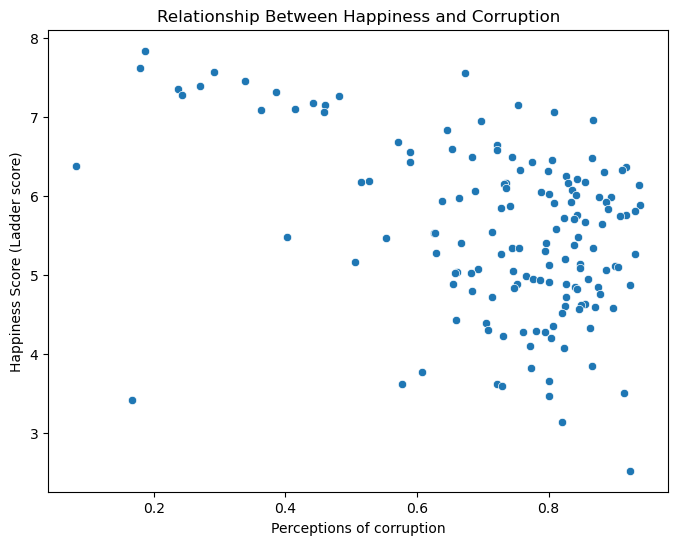

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Perceptions of corruption', y='Ladder score', data=data)
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness Score (Ladder score)')
plt.title('Relationship Between Happiness and Corruption')
plt.show()


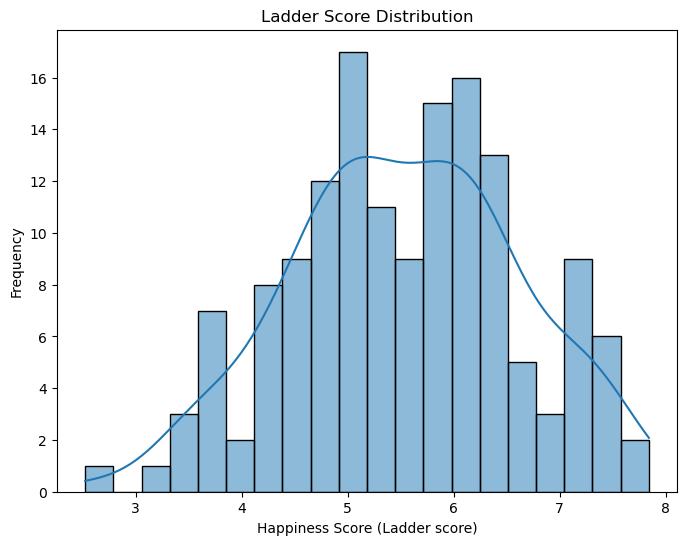

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Ladder score'], bins=20, kde=True)
plt.xlabel('Happiness Score (Ladder score)')
plt.ylabel('Frequency')
plt.title('Ladder Score Distribution')
plt.show()


In [20]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


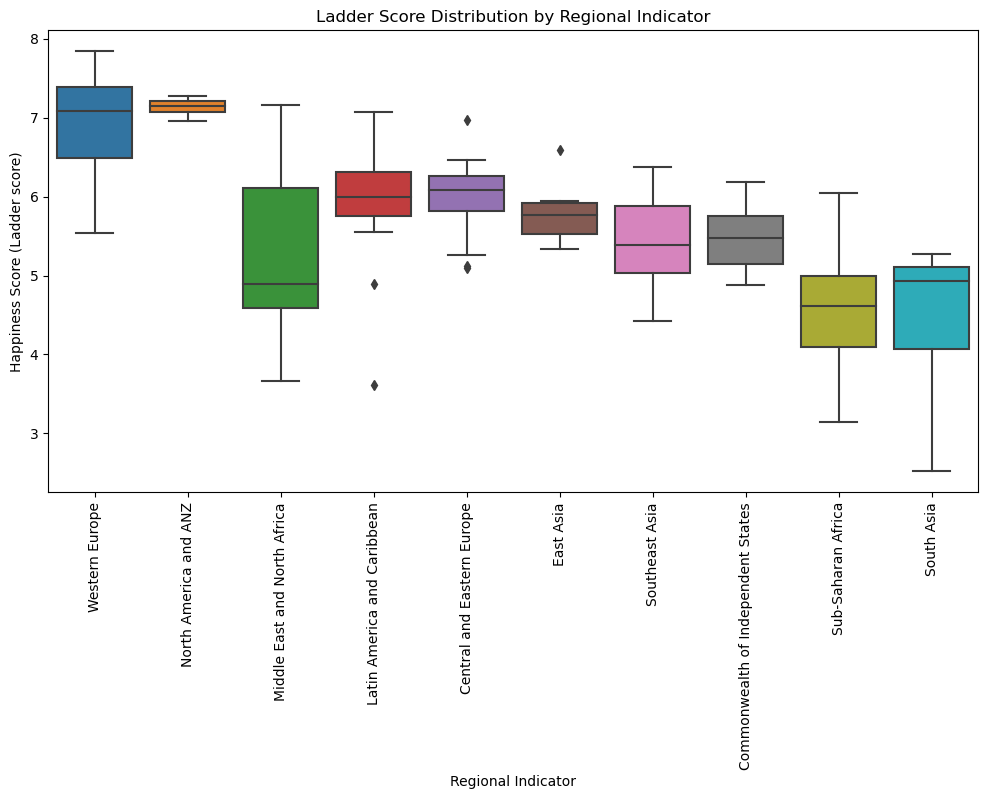

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='Ladder score', data=data)
plt.xticks(rotation=90)
plt.xlabel('Regional Indicator')
plt.ylabel('Happiness Score (Ladder score)')
plt.title('Ladder Score Distribution by Regional Indicator')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7312\3218432617.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


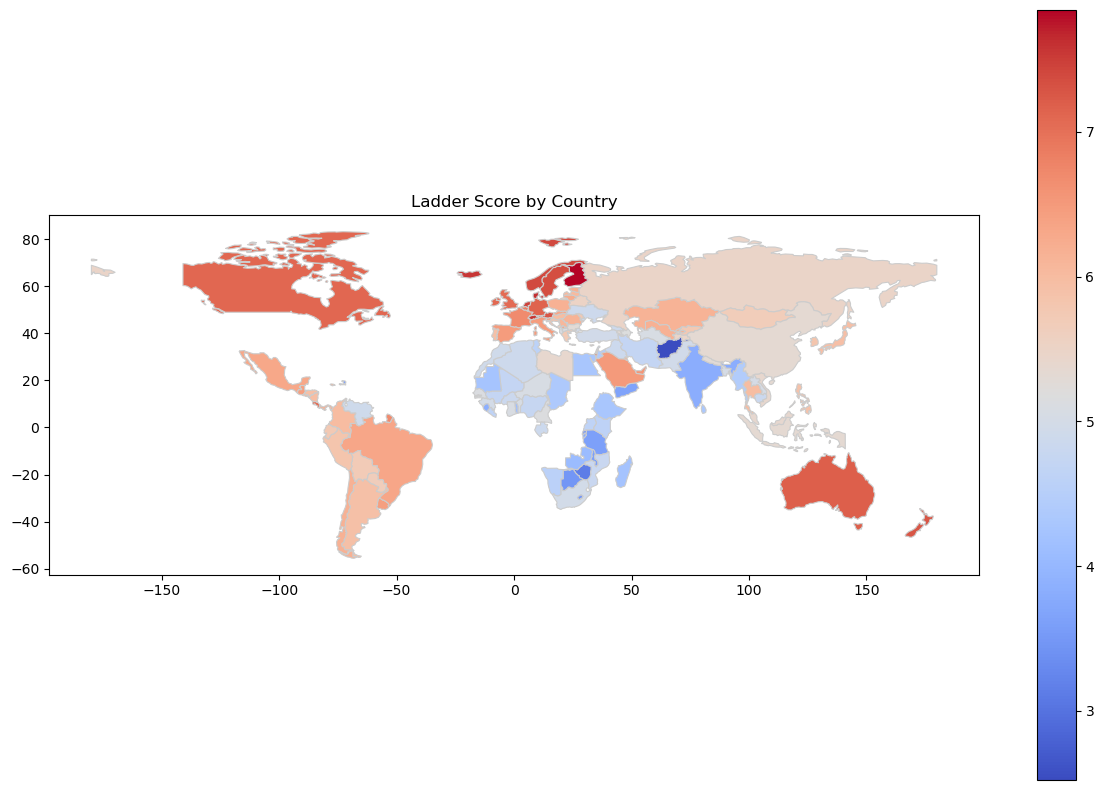

In [22]:
# Load a world map shapefile using geopandas
import geopandas as gpd 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with the happiness data based on the country name
merged = world.set_index('name').join(data.set_index('Country name'))

# Create a map view of Ladder Scores
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Ladder score', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Ladder Score by Country')
plt.show()


In [23]:
# Sort the data by Generosity in descending order to get the most generous countries
most_generous_2021 = data.sort_values(by='Generosity', ascending=False)

# To get the least generous countries, simply change 'ascending=True'
least_generous_2021 = data.sort_values(by='Generosity', ascending=True)

# Display the most generous and least generous countries in 2021
print("Most Generous Countries in 2021:")
print(most_generous_2021[['Country name', 'Generosity']].head(10))

print("\nLeast Generous Countries in 2021:")
print(least_generous_2021[['Country name', 'Generosity']].head(10))


Most Generous Countries in 2021:
       Country name  Generosity
81        Indonesia       0.542
125         Myanmar       0.509
97           Gambia       0.424
142           Haiti       0.422
41       Uzbekistan       0.311
53         Thailand       0.287
120           Kenya       0.287
96     Turkmenistan       0.273
32           Kosovo       0.257
16   United Kingdom       0.233

Least Generous Countries in 2021:
       Country name  Generosity
67           Greece      -0.288
55            Japan      -0.258
145        Botswana      -0.246
57         Portugal      -0.244
107         Georgia      -0.238
105         Morocco      -0.236
89       Azerbaijan      -0.223
45          Romania      -0.219
17   Czech Republic      -0.208
37        Lithuania      -0.203


C:\Users\HP\AppData\Local\Temp\ipykernel_7312\2951927616.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


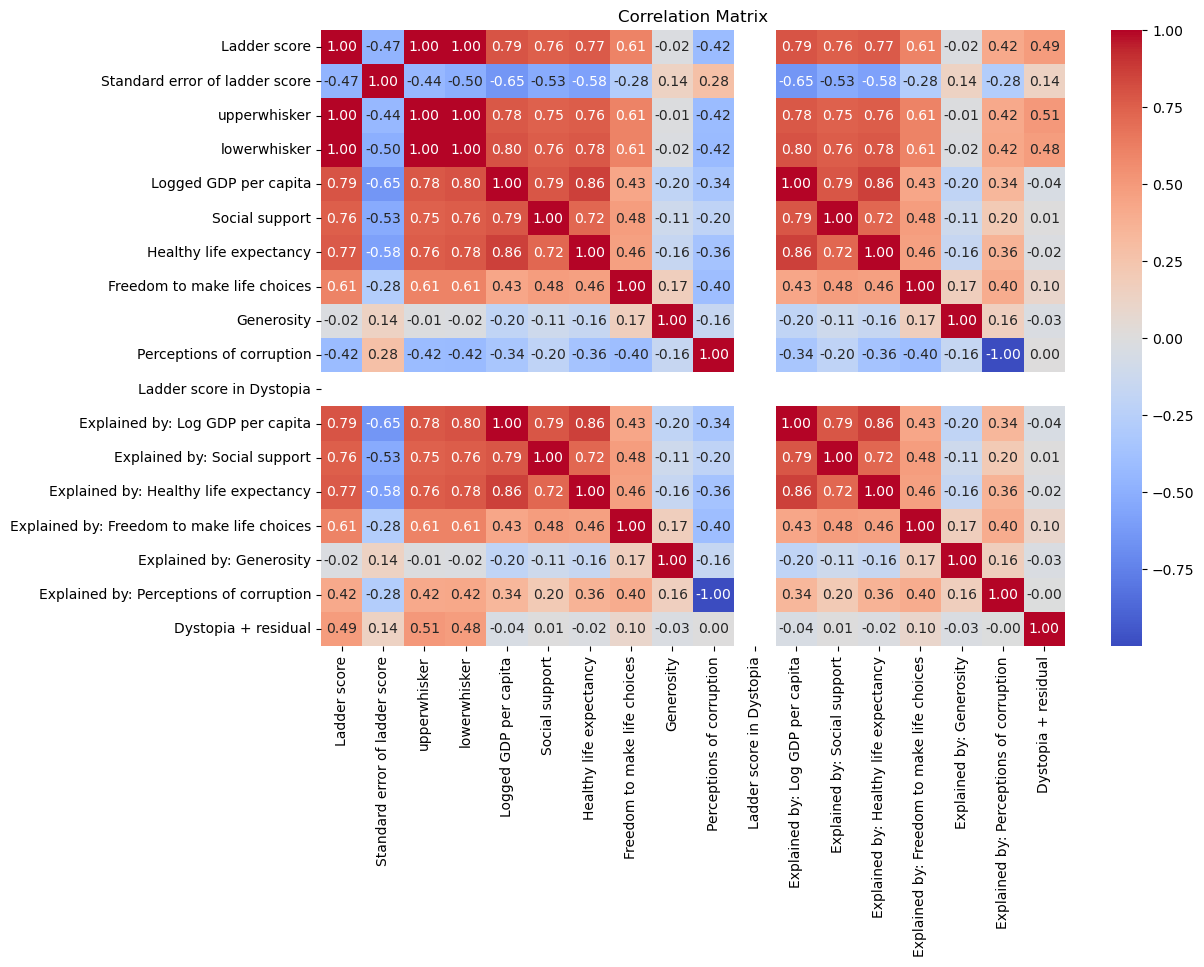

In [24]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Select a subset of columns for the pairplot
selected_features = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a pairplot
sns.pairplot(data[selected_features])
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Freedom to make life choices', y='Healthy life expectancy', data=data)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Healthy life expectancy')
plt.title('Relationship Between Freedom and Healthy Life Expectancy')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Logged GDP per capita', y='Social support', data=data)
plt.xlabel('Income')
plt.ylabel('Social support')
plt.title('Relationship Between Income and Social support')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Freedom to make life choices', y='Ladder score', data=data)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Ladder score')
plt.title('Relationship Between Freedom and Ladder score')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ladder score', y='Freedom to make life choices', data=data)
plt.xlabel('Ladder score')
plt.ylabel('Freedom to make life choices')
plt.title('Relationship Between Ladder score and Freedom')
plt.show()

## Conclusion 
In the analysis of the World Happiness Report dataset for the year 2021, we explored the relationships between different factors and their impact on happiness scores. Several key findings and insights emerged from our analysis:

Income and Happiness: There is a positive correlation between income (Logged GDP per capita) and happiness scores (Ladder score). Countries with higher GDP per capita tend to have higher happiness scores.

Freedom and Happiness: Freedom to make life choices is positively correlated with happiness scores. Countries where individuals have greater freedom tend to report higher levels of happiness.

Corruption and Happiness: Perceptions of corruption are negatively correlated with happiness scores. Countries with lower levels of corruption tend to have higher happiness scores.

Generosity and Happiness: The correlation between generosity and happiness is relatively weak. Generosity alone does not appear to have a strong impact on happiness scores.

Social Support and Healthy Life Expectancy: Social support and healthy life expectancy are positively correlated with happiness scores. Countries that provide strong social support systems and have longer life expectancies tend to report higher levels of happiness.

Correlation Matrix: The correlation matrix provided a comprehensive view of the relationships between all the features. Income, social support, and healthy life expectancy are among the most strongly correlated factors with happiness.

Pairplot Analysis: The pairplot visualization allowed us to observe scatterplots between selected features, providing a visual understanding of the relationships between pairs of variables.

In conclusion, the analysis of the World Happiness Report data for 2021 highlights the importance of income, freedom, low corruption, social support, and healthy life expectancy as key factors contributing to the happiness of a country's residents. While generosity plays a role, its impact appears to be less significant compared to these other factors. This analysis provides valuable insights for policymakers and researchers interested in understanding the determinants of happiness on a global scale.